In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
path = '/home/atorok/private/cogs118afinal/train.csv'
df = pd.read_csv(path)

# df = dfpre.dropna()

In [5]:
df['Class'].value_counts()

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64

In [6]:
print(df.shape)

(17996, 17)


In [7]:
# fig = plt.figure(figsize = (16,12))
# ax = fig.gca()
# df.hist(ax = ax)
# plt.tight_layout();

In [8]:
df['log-instrumentalness'] = np.log(df['instrumentalness'])
df['log-speechiness'] = np.log(df['speechiness'])
df.drop(columns = ['instrumentalness','speechiness'], inplace = True)
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,log-instrumentalness,log-speechiness
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.017100,0.0849,0.8990,134.071,234596.0,4,5,NaN,-3.026191
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.001100,0.1010,0.5690,116.454,251733.0,4,10,-5.518964,-3.203987
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.486000,0.3940,0.7870,147.681,109667.0,4,6,-8.537396,-2.946942
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.021200,0.1220,0.5690,107.033,173968.0,4,5,NaN,-2.891372
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.000169,0.1720,0.0918,199.060,229960.0,4,10,-4.128936,-1.532477


In [9]:
y = np.asarray(df['Class'])
y.shape

(17996,)

In [10]:
print(df.loc[:, ~df.columns.isin(['Class', 'Artist Name', 'Track Name','time_signature','key'])].columns)

Index(['Popularity', 'danceability', 'energy', 'loudness', 'mode',
       'acousticness', 'liveness', 'valence', 'tempo', 'duration_in min/ms',
       'log-instrumentalness', 'log-speechiness'],
      dtype='object')


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
## need this to maintain data as a dataframe or we need to dropna before the processing so that we retain correct labels


col_to_encode = ['time_signature','key']
col_to_scale = df.loc[:, ~df.columns.isin(['Class', 'Artist Name', 'Track Name','time_signature','key'])].columns

scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

scaled_columns  = scaler.fit_transform(df[col_to_scale]) 
encoded_columns =    ohe.fit_transform(df[col_to_encode])

X = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [29]:
X.shape

(17996, 28)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
impute = SimpleImputer()
svc = SVC()
params = {'svc__C':[0.1, 1, 10],
          'svc__kernel':['linear','rbf', 'poly','sigmoid'], 
          'svc__class_weight':[None,'balanced'],
         'svc__max_iter':[1000,10000],
         'imputer__strategy':['mean','median','most_frequent']}

pipe = Pipeline(steps=[("imputer", impute),("svc", svc)])
gs = GridSearchCV(pipe, param_grid = params, verbose = 3)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.474 total time=   8.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.478 total time=   8.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.470 total time=   8.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.483 total time=   9.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.476 total time=   8.0s
[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.505 total time=   8.0s
[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.502 total time=   9.1s
[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.491 total time=  10.5s
[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.504 total time=   9.4s
[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.506 total time=   7.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.481 total time=  11.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.488 total time=  11.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.476 total time=  13.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.482 total time=  10.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.475 total time=  10.4s
[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.506 total time=  12.4s
[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.506 total time=  11.8s
[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.502 total time=  11.5s
[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.515 total time=  12.6s
[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.507 total time=  14.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.445 total time=   9.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.443 total time=  10.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.425 total time=   9.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.430 total time=   9.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.410 total time=   7.8s
[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.473 total time=   9.5s
[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.474 total time=   9.0s
[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.473 total time=  10.5s
[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.472 total time=   9.3s
[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.466 total time=  11.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.423 total time=  14.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.414 total time=  12.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.402 total time=  13.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.398 total time=  14.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.406 total time=  16.5s
[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.444 total time=  14.1s
[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.435 total time=  13.9s
[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.418 total time=  13.5s
[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.422 total time=  13.5s
[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.435 total time=  13.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.353 total time=   5.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.364 total time=   5.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.358 total time=   5.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.341 total time=   6.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.365 total time=   5.2s
[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.441 total time=  12.0s
[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.448 total time=  11.8s
[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.444 total time=  12.1s
[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.442 total time=  11.6s
[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.466 total time=  11.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.380 total time=  10.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.371 total time=  12.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.370 total time=  13.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.398 total time=  12.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.366 total time=  13.2s
[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.449 total time=  20.5s
[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.455 total time=  18.8s
[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.464 total time=  19.8s
[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.440 total time=  19.2s
[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.474 total time=  18.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.277 total time=   8.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.292 total time=   9.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.279 total time=   9.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.281 total time=   9.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.287 total time=   9.6s
[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.480 total time=  17.2s
[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.473 total time=  17.6s
[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.465 total time=  18.2s
[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.472 total time=  17.4s
[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.477 total time=  17.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.361 total time=  14.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.361 total time=  15.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.352 total time=  15.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.353 total time=  15.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.358 total time=  15.4s
[CV 1/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.379 total time=  25.8s
[CV 2/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.379 total time=  25.6s
[CV 3/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.378 total time=  25.7s
[CV 4/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.376 total time=  25.2s
[CV 5/5] END imputer__strategy=mean, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.400 total time=  25.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.372 total time=   7.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.414 total time=   6.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.387 total time=   6.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.409 total time=   6.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.420 total time=   6.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.505 total time=  12.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.504 total time=  13.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.489 total time=  12.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.504 total time=  12.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.507 total time=  12.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.525 total time=  13.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.514 total time=  12.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.517 total time=  12.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.529 total time=  12.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.526 total time=  12.5s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.528 total time=  15.0s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.529 total time=  14.6s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.525 total time=  15.8s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.538 total time=  16.1s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.536 total time=  14.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.480 total time=   9.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.480 total time=  10.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.487 total time=   9.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.488 total time=   9.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.478 total time=   9.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.523 total time=  12.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.519 total time=  11.8s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.516 total time=  12.0s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.527 total time=  12.1s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.519 total time=  11.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.355 total time=  12.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.368 total time=  13.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.334 total time=  13.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.350 total time=  13.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.352 total time=  13.5s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.353 total time=  13.9s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.362 total time=  14.2s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.342 total time=  14.3s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.349 total time=  14.2s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.349 total time=  14.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.346 total time=   7.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.358 total time=   7.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.349 total time=   7.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.351 total time=   7.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.395 total time=   7.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.439 total time=  14.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.445 total time=  14.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.441 total time=  14.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.441 total time=  14.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.459 total time=  14.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.368 total time=  12.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.374 total time=  12.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.365 total time=  12.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.365 total time=  12.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.371 total time=  12.5s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.455 total time=  18.3s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.465 total time=  18.4s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.476 total time=  18.4s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.457 total time=  18.3s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.484 total time=  18.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.369 total time=   9.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.369 total time=   9.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.371 total time=   9.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.366 total time=   9.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.365 total time=   9.4s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.458 total time=  15.1s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.458 total time=  15.0s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.461 total time=  15.0s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.460 total time=  14.6s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.478 total time=  14.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.341 total time=  12.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.345 total time=  12.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.332 total time=  12.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.333 total time=  12.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.342 total time=  12.5s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.301 total time=  18.1s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.320 total time=  17.8s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.321 total time=  17.3s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.315 total time=  17.3s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.323 total time=  17.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.343 total time=   6.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.290 total time=   6.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.240 total time=   6.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.255 total time=   6.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.296 total time=   6.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.428 total time=  17.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.394 total time=  17.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.425 total time=  16.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.444 total time=  16.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.416 total time=  16.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.461 total time=  11.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.436 total time=  11.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.433 total time=  11.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.455 total time=  11.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.449 total time=  11.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.503 total time=  16.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.502 total time=  16.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.508 total time=  16.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.511 total time=  16.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.513 total time=  16.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.435 total time=   8.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.438 total time=   8.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.456 total time=   8.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.435 total time=   8.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.449 total time=   8.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.491 total time=  13.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.487 total time=  13.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.490 total time=  13.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.504 total time=  13.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.499 total time=  13.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.339 total time=  11.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.344 total time=  11.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.316 total time=  11.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.325 total time=  11.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.339 total time=  11.7s
[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.336 total time=  11.8s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.342 total time=  12.3s
[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.325 total time=  12.7s
[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.330 total time=  12.5s
[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.337 total time=  12.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.284 total time=   6.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.288 total time=   6.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.281 total time=   5.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.332 total time=   5.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.312 total time=   5.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.409 total time=  17.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.412 total time=  17.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.416 total time=  17.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.420 total time=  17.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.407 total time=  16.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.377 total time=  11.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.372 total time=  11.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.381 total time=  11.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.388 total time=  10.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.384 total time=  11.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.438 total time=  16.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.453 total time=  16.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.458 total time=  16.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.454 total time=  16.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.466 total time=  16.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.413 total time=   8.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.407 total time=   8.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.425 total time=   7.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.412 total time=   8.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.422 total time=   8.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.434 total time=  13.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.439 total time=  13.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.445 total time=  13.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.438 total time=  13.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.452 total time=  13.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.317 total time=   9.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.322 total time=   9.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.299 total time=   9.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.311 total time=   9.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.330 total time=  10.0s
[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.287 total time=  13.8s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.304 total time=  14.4s
[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.297 total time=  13.8s
[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.290 total time=  13.7s
[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.314 total time=  12.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.478 total time=   7.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.475 total time=   6.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.479 total time=   7.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.477 total time=   8.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.463 total time=   8.0s
[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.505 total time=   7.1s
[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.501 total time=   7.9s
[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.491 total time=   8.5s
[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.505 total time=   8.6s
[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.506 total time=   8.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.482 total time=  11.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.489 total time=  12.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.472 total time=  10.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.473 total time=  10.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.480 total time=  10.0s
[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.506 total time=  13.3s
[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.505 total time=  14.4s
[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.501 total time=  14.6s
[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.515 total time=  14.3s
[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.507 total time=  11.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.437 total time=   9.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.419 total time=   9.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.421 total time=  10.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.431 total time=   8.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.409 total time=   8.2s
[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.471 total time=   9.9s
[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.473 total time=  11.0s
[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.473 total time=  11.8s
[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.472 total time=  10.7s
[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.466 total time=  11.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.423 total time=  15.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.413 total time=  11.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.405 total time=  12.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.399 total time=  15.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.405 total time=  14.7s
[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.445 total time=  16.3s
[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.436 total time=  14.6s
[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.417 total time=  13.4s
[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.420 total time=  14.5s
[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.436 total time=  14.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.359 total time=   5.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.359 total time=   6.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.370 total time=   6.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.349 total time=   6.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.368 total time=   5.1s
[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.440 total time=  10.3s
[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.449 total time=  10.5s
[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.443 total time=   8.2s
[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.441 total time=   8.1s
[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.464 total time=   8.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.378 total time=   9.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.387 total time=  10.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.366 total time=   9.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.380 total time=  11.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.380 total time=   9.6s
[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.448 total time=  15.6s
[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.456 total time=  15.4s
[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.464 total time=  15.2s
[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.439 total time=  13.8s
[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.471 total time=  13.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.287 total time=   6.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.291 total time=   6.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.283 total time=   7.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.294 total time=   7.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.286 total time=   8.1s
[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.480 total time=  13.0s
[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.472 total time=  12.7s
[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.465 total time=  12.4s
[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.472 total time=  11.1s
[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.477 total time=  12.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.362 total time=  14.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.361 total time=  11.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.350 total time=  12.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.354 total time=  12.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.357 total time=  11.6s
[CV 1/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.378 total time=  16.6s
[CV 2/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.380 total time=  16.2s
[CV 3/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.378 total time=  19.4s
[CV 4/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.374 total time=  20.6s
[CV 5/5] END imputer__strategy=median, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.399 total time=  17.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.400 total time=   4.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.374 total time=   4.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.398 total time=   5.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.362 total time=   5.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.364 total time=   6.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.500 total time=   9.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.505 total time=   9.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.491 total time=   9.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.507 total time=  12.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.507 total time=   9.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.526 total time=  13.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.518 total time=  12.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.521 total time=  10.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.532 total time=  11.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.534 total time=   8.6s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.528 total time=  10.0s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.527 total time=  12.0s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.524 total time=  12.5s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.539 total time=   9.8s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.536 total time=   9.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.477 total time=   6.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.482 total time=   6.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.487 total time=   6.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.483 total time=   7.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.477 total time=   7.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.525 total time=   8.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.519 total time=   9.6s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.516 total time=   9.7s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.527 total time=   9.8s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.518 total time=  10.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.355 total time=   9.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.370 total time=   9.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.329 total time=   8.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.344 total time=   9.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.349 total time=   8.9s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.354 total time=   9.3s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.365 total time=   9.6s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.340 total time=   9.9s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.345 total time=   9.5s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.348 total time=   9.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.363 total time=   4.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.378 total time=   4.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.366 total time=   4.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.376 total time=   4.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.386 total time=   4.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.439 total time=  10.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.445 total time=   9.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.439 total time=  10.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.440 total time=  13.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.458 total time=  13.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.364 total time=  11.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.381 total time=   9.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.372 total time=  11.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.374 total time=  11.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.364 total time=  11.1s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.455 total time=  16.7s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.466 total time=  16.4s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.474 total time=  11.8s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.457 total time=  15.8s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.484 total time=  14.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.359 total time=   7.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.373 total time=   7.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.373 total time=   7.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.362 total time=   8.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.360 total time=   9.1s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.457 total time=  15.1s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.458 total time=  13.3s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.460 total time=  14.1s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.458 total time=  13.2s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.476 total time=  14.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.342 total time=  11.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.340 total time=  11.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.334 total time=  11.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.340 total time=  11.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.342 total time=  11.6s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.302 total time=  16.6s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.319 total time=  16.6s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.322 total time=  16.4s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.311 total time=  16.6s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.324 total time=  16.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.292 total time=   6.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.315 total time=   6.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.287 total time=   5.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.288 total time=   5.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.249 total time=   6.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.423 total time=  16.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.427 total time=  16.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.408 total time=  16.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.382 total time=  16.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.415 total time=  16.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.458 total time=  11.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.443 total time=  11.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.446 total time=  10.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.456 total time=  11.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.466 total time=  11.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.503 total time=  16.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.502 total time=  16.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.506 total time=  17.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.509 total time=  16.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.512 total time=  16.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.442 total time=   8.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.430 total time=   8.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.452 total time=   8.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.440 total time=   8.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.449 total time=   8.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.492 total time=  13.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.485 total time=  13.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.494 total time=  13.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.502 total time=  13.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.496 total time=  13.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.340 total time=  11.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.348 total time=  11.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.312 total time=  12.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.323 total time=  12.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.429 total time=  17.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.411 total time=  17.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.415 total time=  17.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.420 total time=  16.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.413 total time=  17.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.380 total time=  11.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.374 total time=  11.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.373 total time=  11.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.384 total time=  11.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.389 total time=  11.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.437 total time=  17.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.452 total time=  17.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.458 total time=  17.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.453 total time=  17.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.466 total time=  17.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.418 total time=   7.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.403 total time=   8.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.415 total time=   8.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.411 total time=   8.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.419 total time=   8.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.432 total time=  14.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.439 total time=  13.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.443 total time=  14.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.438 total time=  13.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.450 total time=  14.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.306 total time=   9.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.322 total time=  10.4s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.314 total time=  14.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.459 total time=   8.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.482 total time=   8.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.476 total time=   8.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.475 total time=   8.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.479 total time=   8.6s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.493 total time=  10.2s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.500 total time=   9.2s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.480 total time=   9.4s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.515 total time=   7.6s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.490 total time=   8.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.482 total time=  13.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.490 total time=  12.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.477 total time=  12.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.485 total time=  11.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.472 total time=  13.9s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.501 total time=  15.7s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.506 total time=  14.6s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.489 total time=  16.9s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.522 total time=  12.7s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.490 total time=  16.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.417 total time=  11.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.421 total time=  11.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.432 total time=  10.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.422 total time=  10.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.412 total time=  11.2s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.479 total time=  13.3s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.472 total time=  10.7s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.475 total time=  10.6s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.485 total time=  10.8s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.460 total time=  13.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.418 total time=  15.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.408 total time=  14.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.398 total time=  13.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.405 total time=  13.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.397 total time=  15.1s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.435 total time=  18.4s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.433 total time=  18.4s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.407 total time=  18.9s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.432 total time=  19.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.427 total time=  19.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.346 total time=   7.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.373 total time=   7.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.368 total time=   7.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.352 total time=   7.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.354 total time=   7.4s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.438 total time=  17.7s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.454 total time=  19.2s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.446 total time=  19.6s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.453 total time=  19.3s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.456 total time=  18.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.299 total time=   7.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.300 total time=   6.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.289 total time=   6.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.280 total time=   6.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.299 total time=   6.4s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.476 total time=  12.9s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.470 total time=  14.5s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.454 total time=  14.6s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.472 total time=  14.2s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.476 total time=  14.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.358 total time=  10.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.365 total time=   9.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.351 total time=  10.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.361 total time=   9.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.349 total time=  10.0s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.369 total time=  16.5s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.383 total time=  16.3s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.364 total time=  16.5s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.380 total time=  15.9s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=0.1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.386 total time=  16.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.412 total time=   4.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.382 total time=   4.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.415 total time=   4.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.398 total time=   4.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.401 total time=   4.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.489 total time=  10.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.500 total time=   8.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.485 total time=   8.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.512 total time=   8.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.493 total time=   8.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.525 total time=  11.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.525 total time=   8.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.519 total time=   8.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.534 total time=   8.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.496 total time=   8.3s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.527 total time=  12.9s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.524 total time=   9.9s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.525 total time=   9.9s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.541 total time=  10.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.521 total time=  12.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.486 total time=   7.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.475 total time=   6.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.485 total time=   7.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.482 total time=   7.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.478 total time=   8.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.522 total time=   9.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.514 total time=   9.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.507 total time=   9.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.529 total time=   9.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.509 total time=   8.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.345 total time=   9.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.362 total time=   9.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.322 total time=   9.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.342 total time=  10.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.342 total time=  10.2s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.342 total time=   9.7s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.355 total time=   9.4s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.331 total time=  10.3s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.345 total time=  11.3s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.341 total time=  10.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.369 total time=   5.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.367 total time=   5.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.346 total time=   6.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.351 total time=   5.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.363 total time=   6.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.432 total time=   9.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.443 total time=   9.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.432 total time=  11.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.448 total time=  10.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.452 total time=  11.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.365 total time=   7.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.375 total time=   7.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.386 total time=   8.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.366 total time=   8.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.378 total time=   7.9s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.446 total time=  11.4s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.471 total time=  11.2s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.463 total time=  11.2s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.466 total time=  10.9s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.471 total time=  11.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.366 total time=   6.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.373 total time=   6.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.368 total time=   6.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.371 total time=   6.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.365 total time=   5.9s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.454 total time=  10.6s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.456 total time=   9.2s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.466 total time=   9.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.466 total time=   8.8s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.459 total time=   9.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.340 total time=   8.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.341 total time=   9.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.319 total time=   9.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.341 total time=   9.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.330 total time=   8.8s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.291 total time=  13.2s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.316 total time=  11.7s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.297 total time=  12.3s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.314 total time=  11.4s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.307 total time=  11.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.242 total time=   4.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.308 total time=   4.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.283 total time=   4.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.286 total time=   4.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1000;, score=0.302 total time=   4.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.399 total time=  11.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=10000;, score=0.408 total time=  11.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1000;, score=0.443 total time=   8.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.500 total time=  13.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.505 total time=  11.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.505 total time=  11.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.523 total time=  11.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=10000;, score=0.504 total time=  13.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.438 total time=   5.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.437 total time=   5.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.451 total time=   5.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.447 total time=   6.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1000;, score=0.437 total time=   6.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.481 total time=  11.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.490 total time=  11.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.486 total time=  11.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.507 total time=   8.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=10000;, score=0.493 total time=  10.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.325 total time=   8.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.339 total time=   8.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.292 total time=   8.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.325 total time=   8.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.325 total time=   8.1s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.323 total time=   8.5s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.343 total time=   8.5s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.299 total time=   8.7s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.329 total time=   8.3s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.322 total time=   8.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.231 total time=   4.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.238 total time=   3.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.244 total time=   4.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.282 total time=   3.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1000;, score=0.300 total time=   3.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.417 total time=  12.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.413 total time=  11.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.409 total time=  13.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.402 total time=  11.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=10000;, score=0.387 total time=  13.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.381 total time=   8.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.376 total time=   9.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.382 total time=   9.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.389 total time=   9.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1000;, score=0.381 total time=   9.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.439 total time=  12.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.454 total time=  12.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.453 total time=  12.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.458 total time=  15.6s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=10000;, score=0.451 total time=  16.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.402 total time=   8.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.403 total time=   8.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.397 total time=   8.4s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.413 total time=   8.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1000;, score=0.412 total time=   6.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.420 total time=  12.1s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.436 total time=  13.8s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.436 total time=  13.3s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.449 total time=  13.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=10000;, score=0.440 total time=  13.9s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.293 total time=   8.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.318 total time=   8.5s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.304 total time=  10.2s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.302 total time=   9.7s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1000;, score=0.328 total time=  10.1s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.273 total time=  12.3s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.305 total time=  11.0s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.295 total time=  10.5s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.288 total time=   9.8s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=10000;, score=0.301 total time=  10.0s


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


GridSearchCV(estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('svc', SVC())]),
             param_grid={'imputer__strategy': ['mean', 'median',
                                               'most_frequent'],
                         'svc__C': [0.1, 1, 10],
                         'svc__class_weight': [None, 'balanced'],
                         'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'svc__max_iter': [1000, 10000]},
             verbose=3)

In [39]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'imputer', 'svc', 'imputer__add_indicator', 'imputer__copy', 'imputer__fill_value', 'imputer__missing_values', 'imputer__strategy', 'imputer__verbose', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [57]:
gs.best_params_

{'imputer__strategy': 'mean',
 'svc__C': 1,
 'svc__class_weight': None,
 'svc__kernel': 'rbf',
 'svc__max_iter': 10000}

In [60]:
gs.cv_results_

{'mean_fit_time': array([ 6.69132223,  7.16528616,  8.39609385,  9.85753303,  7.49404831,
         8.26010313, 11.37307105, 11.19217548,  4.32878261, 10.01980062,
         9.32747955, 16.42494116,  7.7910933 , 15.45970054, 11.72566676,
        21.81383238,  5.19254465, 10.89286675,  9.54411321, 12.09432549,
         7.72902856,  9.92889266, 10.39648151, 11.10330791,  5.74291983,
        12.68079705,  9.16629138, 14.8197763 ,  7.30301805, 12.6702147 ,
         9.29218321, 14.30475106,  4.55680017, 14.87934504,  8.06858659,
        13.4540946 ,  6.46462941, 11.38430247,  8.861409  ,  9.46999531,
         4.40271749, 15.11758652,  8.20950637, 13.3766665 ,  6.14033637,
        11.29496794,  7.17718668, 10.80822878,  5.78895979,  6.60356503,
         8.04470539, 10.80353966,  7.43469725,  9.09756756, 11.27924972,
        11.62431178,  4.31483679,  7.70802622,  7.16228623, 12.43616142,
         5.44047561, 10.83474016,  9.49982538, 15.45726576,  3.80744433,
         8.24768686,  8.40915961, 

In [16]:
svc = SVC()
impute = SimpleImputer(strategy = 'mean')
pipe = Pipeline(steps=[("imputer", impute),("svc", svc)]) ## best hyperparams from GS are all default
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)



AttributeError: 'Pipeline' object has no attribute 'keys'

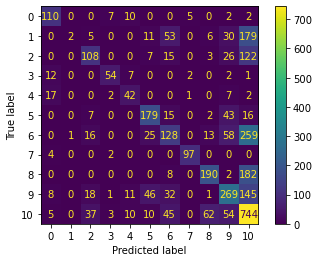

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

In [32]:
accuracy = balanced_accuracy_score(y_test, y_pred, adjusted = False)
print(accuracy)

0.5578138805922357


In [24]:
f1_score(y_test, y_pred, average = 'weighted')

0.5033677774303048

In [25]:
class_weights = np.asarray(np.unique(y_test, return_counts=True))
print(class_weights)

[[  0   1   2   3   4   5   6   7   8   9  10]
 [136 286 281  78  71 262 500 103 382 531 970]]


In [27]:
from sklearn.model_selection import learning_curve
train_size_abs, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), verbose = 3)

[learning_curve] Training set sizes: [ 1151  2303  3454  4606  5758  6909  8061  9212 10364 11516]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.655, test=0.485) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END ..................., score=(train=0.640, test=0.503) total time=   1.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] END ..................., score=(train=0.610, test=0.512) total time=   1.8s
[CV] END ..................., score=(train=0.601, test=0.515) total time=   2.9s
[CV] END ..................., score=(train=0.606, test=0.521) total time=   3.7s
[CV] END ..................., score=(train=0.598, test=0.528) total time=   4.9s
[CV] END ..................., score=(train=0.600, test=0.532) total time=   6.2s
[CV] END ..................., score=(train=0.600, test=0.531) total time=   8.1s
[CV] END ..................., score=(train=0.597, test=0.528) total time=  10.2s
[CV] END ..................., score=(train=0.595, test=0.528) total time=  12.0s
[CV] END ..................., score=(train=0.654, test=0.493) total time=   0.4s
[CV] END ..................., score=(train=0.629, test=0.506) total time=   1.0s
[CV] END ..................., score=(train=0.611, test=0.508) total time=   1.7s
[CV] END ..................., score=(train=0.602, test=0.512) total time=   2.6s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.3min finished


In [32]:
train_list = []
for x in train_size_abs:
    train_list.append(str(x))

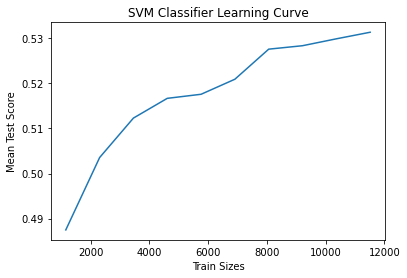

In [31]:
plt.plot(train_size_abs, np.mean(test_scores, axis = 1))
plt.xlabel('Train Sizes')
plt.ylabel('Mean Test Score')
plt.title('SVM Classifier Learning Curve');

In [ ]:
import sklearn
sklearn.__version__